Write a Python function that implements kNN for this task and reports the accuracy for each
class (10 numbers) as well as the average accuracy (one number).
[acc acc av] = kNN(images train, labels train, images test, labels test, k)
where acc is a vector of length 10 and acc av is a scalar. Look at a few correct and wrong
predictions to see if it makes sense. To speed it up, in all experiments, you may use only the first
1000 testing images.

In [15]:
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

# Download the MNIST dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transforms.Compose([transforms.ToTensor()]))
x_train = trainset.data.numpy().reshape((trainset.data.shape[0], 28*28))  # flatten the images
y_train = trainset.targets.numpy()  # get the labels

testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)
images, labels = next(iter(train_loader))
x_test = images.numpy().reshape((images.shape[0], 28*28))
y_test = labels.numpy()

# x_test = testset.data[:1000].numpy().reshape((testset.data[:1000].shape[0], 28*28))  # use only 1000 images, and flattened to 784 to fit the model
# y_test = testset.targets[:1000].numpy()  # use only 1000 labels

print("train_x.shape", x_train.shape)
print("train_y.shape", y_train.shape)
print("test_x.shape: ", x_test.shape)
print("test_y.shape: ", y_test.shape)

train_x.shape (60000, 784)
train_y.shape (60000,)
test_x.shape:  (1000, 784)
test_y.shape:  (1000,)


Write a Python function that implements kNN for this task and reports the accuracy for each
class (10 numbers) as well as the average accuracy (one number).
[acc acc av] = kNN(images train, labels train, images test, labels test, k)
where acc is a vector of length 10 and acc av is a scalar. Look at a few correct and wrong
predictions to see if it makes sense. To speed it up, in all experiments, you may use only the first
1000 testing images.

In [16]:
import numpy as np
from statistics import mode
from torch import nn
from time import sleep


class kNeaerestNeighbor(nn.Module):
    def __init__(self):
        super(kNeaerestNeighbor, self).__init__()

    def _train(self, X, y):
        """
        Since the KNN classifer is non-parametric, just included the training data as the class variables

        Parameters
        ----------
        X : np.ndarray
            a 28x28 flattened image of training data

        y : np.ndarray
            the labels of the training data
        """
        self.X_train = X
        self.y_train = y

    def _calculate_distance(self, src, target, distance_type="l2"):
        """
        Calculates the distance between two vectors

        Parameters
        ----------
        src : np.ndarray
            the source vector

        target : np.ndarray
            the target vector

        distance_type: str
            type of distance

        Returns
        -------
        distance : float
            the L2 or Euclidian distance between the two vectors
        """
        if distance_type == "l1":
            return np.sum(np.abs(src - target))
        elif distance_type == "l2":
            return np.sqrt(np.sum(np.square(src - target)))
        else:
            raise Exception("Currently only support euclidian distance")

    def predict(self, x, k=1, distance_type="l2"):
        """
        Predicts the label of the image

        Parameters
        ----------
        x : np.ndarray
            a 28x28 flattened image of the test data

        k : int
            the number of neighbors to consider

        Returns
        -------
        label : int
            the label of the image
        """
        # calculate the distance between the test image and all the training images
        distances = np.array(
            [
                self._calculate_distance(x, train_image, distance_type=distance_type)
                for train_image in self.X_train
            ]
        )

        # get the indices of the k closest images
        closest_image_indices = np.argsort(distances)[:k]

        # # visualize image and the k closest images
        # plt.imshow(x.reshape(28, 28))
        # plt.show()
        # for i in range(k):
        #     plt.imshow(self.X_train[closest_image_indices[i]].reshape(28, 28))
        #     plt.show()
        # sleep(1)

        # get the label of the k closet images, and find the one appeared the most
        labels = self.y_train[closest_image_indices]
        return mode(labels)

    def forward(self, x_train, y_train, x_test, y_test, k=1, distance_type="l2"):
        # train the model - just mark the training data as the class variables
        self._train(x_train, y_train)

        predictions = np.array(
            [
                self.predict(test_image, k=k, distance_type=distance_type)
                for test_image in x_test
            ]
        )
        # calculate the class accuracy for each class and the overall accuracy
        class_accuracies = {}
        for i in range(10):
            class_accuracies[i] = np.sum(
                np.logical_and(predictions == i, y_test == i)
            ) / np.sum(y_test == i)
        overall_accuracy = np.sum(predictions == y_test) / len(y_test)
        return class_accuracies, overall_accuracy

For k = 1, change the number of training data points (30 to 10,000) to see the change in per-
formance. Plot the average accuracy for 10 different dataset sizes. In the plot, x-axis is for the
number of training data and y-axis is for the accuracy.

=== Training size: 30 ===
Class accuracies:  {0: 0.7717391304347826, 1: 0.981651376146789, 2: 0.26595744680851063, 3: 0.5785123966942148, 4: 0.46808510638297873, 5: 0.5189873417721519, 6: 0.4722222222222222, 7: 0.8058252427184466, 8: 0.1568627450980392, 9: 0.336734693877551}
Overall accuracy:  0.541
=== Training size: 50 ===
Class accuracies:  {0: 0.8913043478260869, 1: 0.9908256880733946, 2: 0.4148936170212766, 3: 0.32231404958677684, 4: 0.43617021276595747, 5: 0.31645569620253167, 6: 0.8888888888888888, 7: 0.3883495145631068, 8: 0.3137254901960784, 9: 0.7040816326530612}
Overall accuracy:  0.571
=== Training size: 100 ===
Class accuracies:  {0: 0.6630434782608695, 1: 0.908256880733945, 2: 0.6063829787234043, 3: 0.743801652892562, 4: 0.7340425531914894, 5: 0.6455696202531646, 6: 0.8888888888888888, 7: 0.883495145631068, 8: 0.7156862745098039, 9: 0.40816326530612246}
Overall accuracy:  0.727
=== Training size: 200 ===
Class accuracies:  {0: 0.8695652173913043, 1: 0.9908256880733946, 2:

Text(0.5, 1.0, 'Overall accuracy vs. training size')

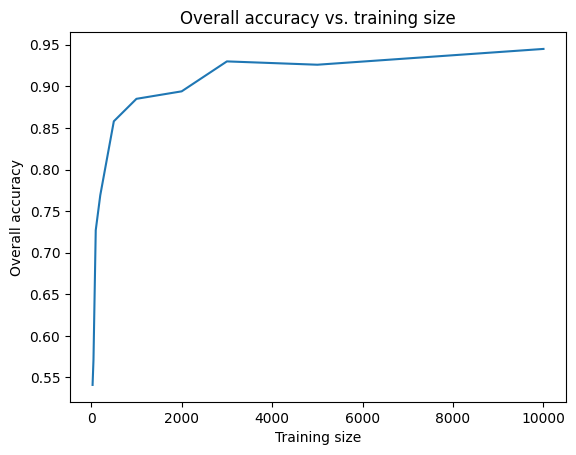

In [17]:
train_size = [30, 50, 100, 200, 500, 1000, 2000, 3000, 5000, 10000]
k = 1

overall_accuracy_list = []
for hyper_train_size in train_size:
    # randomly sample the training data
    random_batch = torch.utils.data.DataLoader(
        trainset, batch_size=hyper_train_size, shuffle=True
    )
    images, labels = next(iter(random_batch))
    x_train_random = images.numpy().reshape((images.shape[0], 28 * 28))
    y_train_random = labels.numpy()

    # train the model and get the accuracies
    kNN = kNeaerestNeighbor()
    class_accuracies, overall_accuracy = kNN(
        x_train_random, y_train_random, x_test, y_test, k=k, distance_type="l2"
    )
    print("=== Training size: {} ===".format(hyper_train_size))
    print("Class accuracies: ", class_accuracies)
    print("Overall accuracy: ", overall_accuracy)
    overall_accuracy_list.append(overall_accuracy)

# plot the overall accuracy vs. training size graph
plt.plot(train_size, overall_accuracy_list)
plt.xlabel("Training size")
plt.ylabel("Overall accuracy")
plt.title("Overall accuracy vs. training size")

=== Training size: 30 ===
Class accuracies:  {0: 0.6739130434782609, 1: 0.9357798165137615, 2: 0.3723404255319149, 3: 0.6363636363636364, 4: 0.7553191489361702, 5: 0.4177215189873418, 6: 0.7962962962962963, 7: 0.7087378640776699, 8: 0.5196078431372549, 9: 0.336734693877551}
Overall accuracy:  0.625
=== Training size: 50 ===
Class accuracies:  {0: 0.7717391304347826, 1: 0.9908256880733946, 2: 0.20212765957446807, 3: 0.6942148760330579, 4: 0.5319148936170213, 5: 0.3037974683544304, 6: 0.6481481481481481, 7: 0.8155339805825242, 8: 0.3333333333333333, 9: 0.6122448979591837}
Overall accuracy:  0.604
=== Training size: 100 ===
Class accuracies:  {0: 0.8478260869565217, 1: 0.981651376146789, 2: 0.4148936170212766, 3: 0.7520661157024794, 4: 0.7872340425531915, 5: 0.4177215189873418, 6: 0.7037037037037037, 7: 0.7669902912621359, 8: 0.6078431372549019, 9: 0.5816326530612245}
Overall accuracy:  0.696
=== Training size: 200 ===
Class accuracies:  {0: 0.8043478260869565, 1: 0.981651376146789, 2: 0.

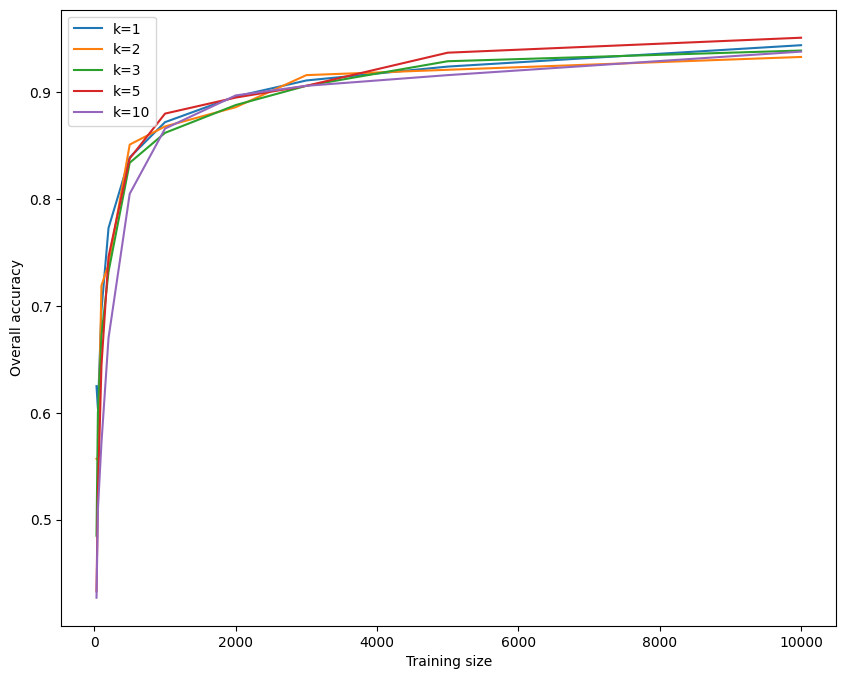

In [18]:
np.random.seed(0)
train_size = [30, 50, 100, 200, 500, 1000, 2000, 3000, 5000, 10000]
k = [1, 2, 3, 5, 10]
overall_accuracy_list_k = []
for k_size in k:
    overall_accuracy_list = []
    for hyper_train_size in train_size:
        # randomly select the training data
        random_batch = torch.utils.data.DataLoader(
        trainset, batch_size=hyper_train_size, shuffle=True
    )
        images, labels = next(iter(random_batch))
        x_train_random = images.numpy().reshape((images.shape[0], 28 * 28))
        y_train_random = labels.numpy()
        # train the model and get the accuracies
        kNN = kNeaerestNeighbor()
        class_accuracies, overall_accuracy = kNN(
            x_train_random, y_train_random, x_test, y_test, k=k_size, distance_type="l1"
        )
        print("=== Training size: {} ===".format(hyper_train_size))
        print("Class accuracies: ", class_accuracies)
        print("Overall accuracy: ", overall_accuracy)
        overall_accuracy_list.append(overall_accuracy)
    overall_accuracy_list_k.append(overall_accuracy_list)

# plot the overall accuracy vs. training size graph, and different color for differee k
plt.figure(figsize=(10, 8))
for i in range(len(k)):
    plt.plot(train_size, overall_accuracy_list_k[i], label="k={}".format(k[i]))
plt.xlabel("Training size")
plt.ylabel("Overall accuracy")
plt.legend()
plt.show()

how the effect of k on the accuracy. Make a plot similar to the above one with multiple colored
curves on the top of each other (each for a particular k in [1 2 3 5 10].)

=== k: 1 ===
Class accuracies:  {0: 0.8035714285714286, 1: 0.991304347826087, 2: 0.5853658536585366, 3: 0.4639175257731959, 4: 0.4482758620689655, 5: 0.42424242424242425, 6: 0.7843137254901961, 7: 0.6666666666666666, 8: 0.3333333333333333, 9: 0.696078431372549}
Overall accuracy:  0.631
=== k: 2 ===
Class accuracies:  {0: 0.8035714285714286, 1: 0.991304347826087, 2: 0.5853658536585366, 3: 0.4639175257731959, 4: 0.4482758620689655, 5: 0.42424242424242425, 6: 0.7843137254901961, 7: 0.6666666666666666, 8: 0.3333333333333333, 9: 0.696078431372549}
Overall accuracy:  0.631
=== k: 3 ===
Class accuracies:  {0: 0.8660714285714286, 1: 1.0, 2: 0.5121951219512195, 3: 0.44329896907216493, 4: 0.4482758620689655, 5: 0.40404040404040403, 6: 0.8235294117647058, 7: 0.7156862745098039, 8: 0.46078431372549017, 9: 0.7058823529411765}
Overall accuracy:  0.652
=== k: 5 ===
Class accuracies:  {0: 0.8928571428571429, 1: 1.0, 2: 0.5, 3: 0.5463917525773195, 4: 0.4482758620689655, 5: 0.3939393939393939, 6: 0.8137

Text(0.5, 1.0, 'Overall accuracy vs. k')

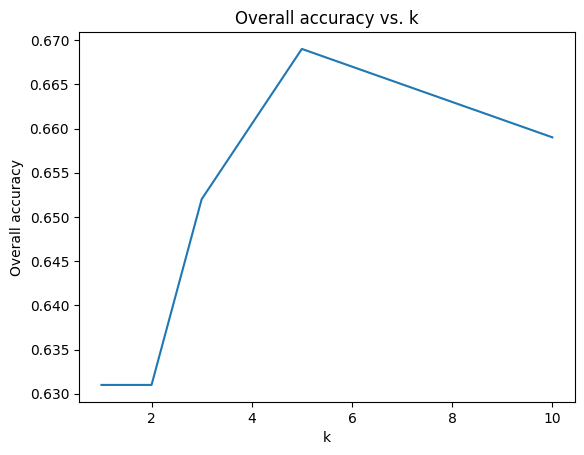

In [ ]:
# random select 2000 datas and randomly split into 2 groups
random_indices = np.random.choice(len(x_train), 2000, replace=False)
x_random = x_train[random_indices]
y_random = y_train[random_indices]

random_indices_1 = np.random.choice(len(x_train_random), 1000, replace=False)
random_indices_2 = np.array(
    [i for i in range(len(x_train_random)) if i not in random_indices_1]
)
x_train = x_train_random[random_indices_1]
y_train = y_train_random[random_indices_1]

x_val = x_train_random[random_indices_2]
y_val = y_train_random[random_indices_2]

# train the model and get the accuracies
kNN = kNeaerestNeighbor()
k_list = [1, 2, 3, 5, 10]
accuracies = []
for k in k_list:
    class_accuracies, overall_accuracy = kNN(
        x_train, y_train, x_val, y_val, k=k, distance_type="l1"
    )
    print("=== k: {} ===".format(k))
    print("Class accuracies: ", class_accuracies)
    print("Validation Accuracy: ", overall_accuracy)
    accuracies.append(overall_accuracy)

# plot the overall accuracy vs. k graph, with caption of the accuracies
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Overall accuracy")
plt.title("Overall accuracy vs. k")


5 is among the best k to tune in this particular settings.